In [32]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [33]:
from pandas_datareader import DataReader

In [34]:
from datetime import datetime

In [35]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [36]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [37]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    
# 文字列のAAPLにデータフレームのデータを格納している

### globals とは
元のデータ型を無視して、新しいデータ型としてデータを格納することができる

In [38]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-11,196.000000,193.600006,194.860001,194.809998,26932900.0,192.512451
2019-06-12,195.970001,193.389999,193.949997,194.190002,18221800.0,191.899780
2019-06-13,196.789993,193.600006,194.699997,194.149994,21674600.0,191.860229
2019-06-14,193.589996,190.300003,191.550003,192.740005,18761500.0,190.466873
2019-06-17,194.960007,192.169998,192.899994,193.889999,14669100.0,191.603317
...,...,...,...,...,...,...
2020-06-05,331.750000,323.230011,323.350006,331.500000,34312600.0,331.500000
2020-06-08,333.600006,327.320007,330.250000,333.459991,23913600.0,333.459991
2020-06-09,345.609985,332.010010,332.140015,343.989990,36928100.0,343.989990


In [39]:
AAPL.info()

# データの外観を把握、欠損値はあるか、データは均一に揃っているか等を確認する

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-06-11 to 2020-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


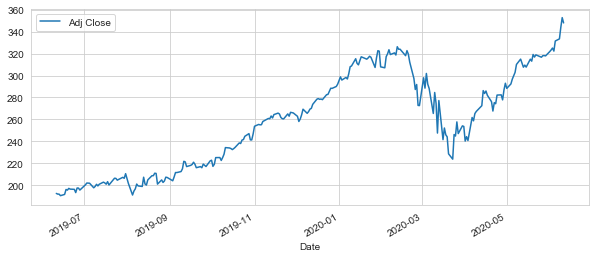

In [40]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

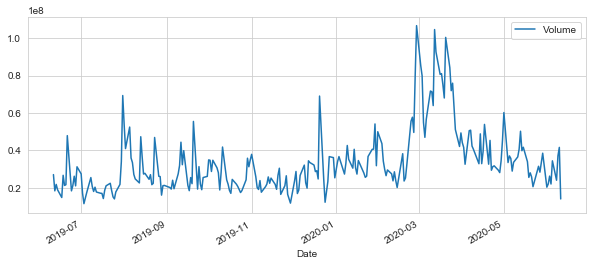

In [41]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [42]:
ma_day = [10,20,50,200]

In [43]:
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [44]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,MA 200
Date,,,,,,,,,,
2019-06-11,196.000000,193.600006,194.860001,194.809998,26932900.0,192.512451,NaN,NaN,NaN,NaN
2019-06-12,195.970001,193.389999,193.949997,194.190002,18221800.0,191.899780,NaN,NaN,NaN,NaN
2019-06-13,196.789993,193.600006,194.699997,194.149994,21674600.0,191.860229,NaN,NaN,NaN,NaN
2019-06-14,193.589996,190.300003,191.550003,192.740005,18761500.0,190.466873,NaN,NaN,NaN,NaN
2019-06-17,194.960007,192.169998,192.899994,193.889999,14669100.0,191.603317,NaN,NaN,NaN,NaN


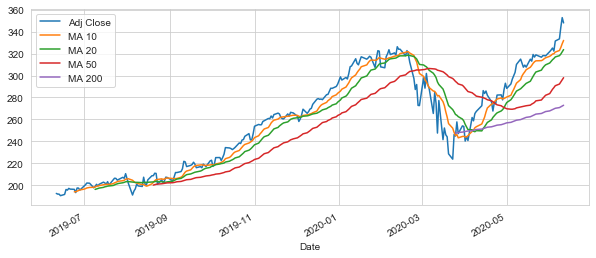

In [45]:
AAPL[['Adj Close','MA 10','MA 20','MA 50','MA 200']].plot(subplots=False,figsize=(10,4))

In [46]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

#変化率を取得する

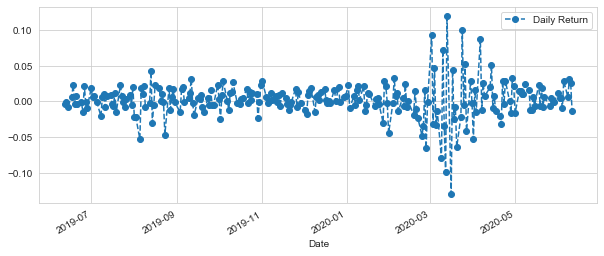

In [48]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

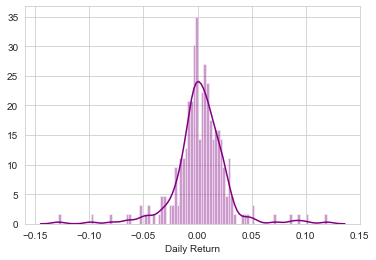

In [49]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

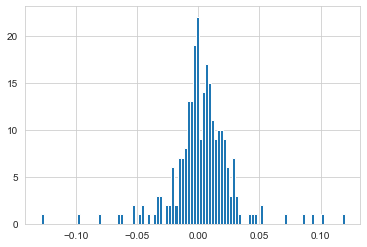

In [50]:
AAPL['Daily Return'].hist(bins=100)

In [52]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [54]:
tech_rets = closing_df.pct_change()

# 各株価の変化率を取得する

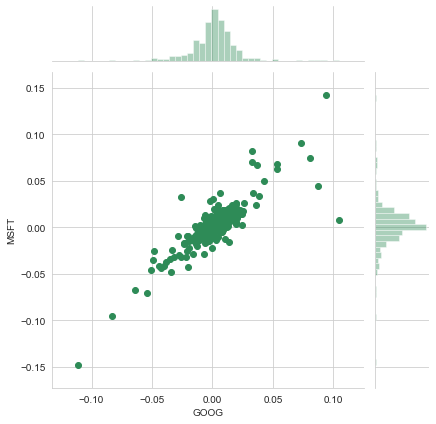

In [56]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')